# Load the cleaned texts


In [1]:
import json 

with open('cleaned_results.json', 'r', encoding='utf-8') as f:
    cleaned_texts = json.load(f)

In [2]:
cleaned_texts

{'Compliance Report 4.pdf': {'text': '0\nResiVied 06/08/2023 - 07/07/2023\nAirView\nCompliance Report\nInitial compliance period 06/08/2028 - 07/07/2023\nCompliance met Yes\nCompliance percentage 70 %\nPayor Standard\nUsage days 22/30 days 73 % 4 hours 21 days 70 %\n4 hours 1 days 3 %\nUsage hours 149 hours 48 minutes\nAverage usage total days 5 hours 0 minutes\nAverage usage days used 6 hours 49 minutes\nMedian usage days used 6 hours 55 minutes\nTotal used hours value since last reset - 07/07/2023 276 hours: MirSanca AutoSe\nSerial number 23231350306\nMode CPAP\nSet pressure: 15 cemH20\nEPR Fulltime\nEPR level 3\nerap\nLeaks - L/min Median: 34, 5 95th percentile: 62. 6 Maximum: 72. 7\nEvents per hour Al: 4. 0 Hk: 21 AHI: 6. 1\nApnea Index Central: 1. 8 Obstructive: 0. 4 Unknown: 1. 7\nRERA Index 1. 3\nCheyne-Stokes respiration average duration per night 7 minutes 2 %\nUsage - hours\n8 10 12 14 16 18 20 22 24 26 28 30 2. 4 6\nPrinted on 07/11/2023 - ResMed Airview version 4. 41. 0-9. 

In [3]:
# Assuming `cleaned_texts` is your dictionary with each document's text and label
combined_texts_by_label = {}

for filename, data in cleaned_texts.items():
    label = data['label']
    text = data['text']
    
    # Concatenate text for each label
    if label not in combined_texts_by_label:
        combined_texts_by_label[label] = text
    else:
        combined_texts_by_label[label] += " " + text  # Add a space between texts

In [4]:
combined_texts_by_label

{'Compliance': '0\nResiVied 06/08/2023 - 07/07/2023\nAirView\nCompliance Report\nInitial compliance period 06/08/2028 - 07/07/2023\nCompliance met Yes\nCompliance percentage 70 %\nPayor Standard\nUsage days 22/30 days 73 % 4 hours 21 days 70 %\n4 hours 1 days 3 %\nUsage hours 149 hours 48 minutes\nAverage usage total days 5 hours 0 minutes\nAverage usage days used 6 hours 49 minutes\nMedian usage days used 6 hours 55 minutes\nTotal used hours value since last reset - 07/07/2023 276 hours: MirSanca AutoSe\nSerial number 23231350306\nMode CPAP\nSet pressure: 15 cemH20\nEPR Fulltime\nEPR level 3\nerap\nLeaks - L/min Median: 34, 5 95th percentile: 62. 6 Maximum: 72. 7\nEvents per hour Al: 4. 0 Hk: 21 AHI: 6. 1\nApnea Index Central: 1. 8 Obstructive: 0. 4 Unknown: 1. 7\nRERA Index 1. 3\nCheyne-Stokes respiration average duration per night 7 minutes 2 %\nUsage - hours\n8 10 12 14 16 18 20 22 24 26 28 30 2. 4 6\nPrinted on 07/11/2023 - ResMed Airview version 4. 41. 0-9. 0 Page 1 of i ay ResMe

In [5]:
import re
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/deveshsurve/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deveshsurve/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
class DocumentAnalyzer:
    def __init__(self, doc_dict):
        self.doc_dict = doc_dict
        self.stop_words = set(stopwords.words('english'))
        
    def keyword_frequency_analysis(self):
        """1. Analyze keyword frequencies specific to each category"""
        print("\n=== KEYWORD FREQUENCY ANALYSIS ===")
        category_keywords = {
            'Compliance': ['compliance', 'usage', 'period', 'percentage', 'met'],
            'Sleep': ['sleep', 'study', 'apnea', 'diagnostic', 'polysomnography'],
            'Order': ['order', 'prescribed', 'supply', 'equipment', 'authorized'],
            'Delivery': ['delivery', 'equipment', 'receipt', 'service', 'supplied'],
            'Physician': ['assessment', 'diagnosis', 'examination', 'prescribed', 'treatment'],
            'Prescription': ['rx', 'prescribed', 'dosage', 'prescription', 'refill']
        }
        
        for category, text in self.doc_dict.items():
            words = word_tokenize(text.lower())
            word_freq = Counter(words)
            relevant_keywords = category_keywords.get(category, [])
            print(f"\n{category} key terms:")
            for keyword in relevant_keywords:
                print(f"- {keyword}: {word_freq.get(keyword, 0)} occurrences")

    def document_structure_analysis(self):
        """2. Analyze document structure patterns"""
        print("\n=== DOCUMENT STRUCTURE ANALYSIS ===")
        for category, text in self.doc_dict.items():
            first_lines = text.split('\n')[:3]
            print(f"\n{category} starts with:")
            for line in first_lines:
                if line.strip():
                    print(f"- {line.strip()}")

    def date_pattern_analysis(self):
        """3. Analyze date formats and frequencies"""
        print("\n=== DATE PATTERN ANALYSIS ===")
        date_patterns = [
            r'\d{1,2}/\d{1,2}/\d{2,4}',  # MM/DD/YYYY
            r'\d{1,2}-\d{1,2}-\d{2,4}',   # MM-DD-YYYY
            r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{1,2},? \d{4}\b'  # Month DD, YYYY
        ]
        
        for category, text in self.doc_dict.items():
            dates = []
            for pattern in date_patterns:
                dates.extend(re.findall(pattern, text))
            print(f"\n{category} contains {len(dates)} dates")
            if dates:
                print(f"Sample dates: {dates[:2]}")

    def numerical_pattern_analysis(self):
        """4. Analyze numerical patterns"""
        print("\n=== NUMERICAL PATTERN ANALYSIS ===")
        for category, text in self.doc_dict.items():
            numbers = re.findall(r'\d+(?:\.\d+)?(?:\s*%)?', text)
            percentages = re.findall(r'\d+(?:\.\d+)?\s*%', text)
            print(f"\n{category}:")
            print(f"- Total numbers found: {len(numbers)}")
            print(f"- Percentages found: {len(percentages)}")

    def form_field_analysis(self):
        """5. Analyze form fields"""
        print("\n=== FORM FIELD ANALYSIS ===")
        field_patterns = [
            r'(?:Name|Date|ID|DOB|Phone|Fax):\s*\S+',
            r'(?:Address|Location|Facility):\s*\S+'
        ]
        
        for category, text in self.doc_dict.items():
            fields = []
            for pattern in field_patterns:
                fields.extend(re.findall(pattern, text, re.IGNORECASE))
            print(f"\n{category} form fields: {len(fields)}")
            if fields:
                print(f"Sample fields: {fields[:2]}")

    def time_reference_analysis(self):
        """6. Analyze time references"""
        print("\n=== TIME REFERENCE ANALYSIS ===")
        time_patterns = [
            r'\d{1,2}:\d{2}\s*(?:AM|PM)?',
            r'(?:hour|minute|day|week|month|year)s?',
            r'(?:morning|afternoon|evening|night)'
        ]
        
        for category, text in self.doc_dict.items():
            time_refs = []
            for pattern in time_patterns:
                time_refs.extend(re.findall(pattern, text, re.IGNORECASE))
            print(f"\n{category} time references: {len(time_refs)}")
            if time_refs:
                print(f"Sample references: {time_refs[:2]}")

    def medical_term_density(self):
        """7. Analyze medical terminology density"""
        print("\n=== MEDICAL TERMINOLOGY DENSITY ===")
        medical_terms = [
            'patient', 'diagnosis', 'treatment', 'prescription', 'medication',
            'dosage', 'symptoms', 'examination', 'assessment', 'therapy'
        ]
        
        for category, text in self.doc_dict.items():
            words = word_tokenize(text.lower())
            medical_count = sum(1 for word in words if word in medical_terms)
            density = medical_count / len(words) if words else 0
            print(f"\n{category}:")
            print(f"- Medical terms: {medical_count}")
            print(f"- Density: {density:.2%}")

    def document_length_analysis(self):
        """8. Analyze document lengths"""
        print("\n=== DOCUMENT LENGTH ANALYSIS ===")
        for category, text in self.doc_dict.items():
            words = word_tokenize(text)
            sentences = sent_tokenize(text)
            print(f"\n{category}:")
            print(f"- Words: {len(words)}")
            print(f"- Sentences: {len(sentences)}")
            print(f"- Characters: {len(text)}")

    def header_footer_analysis(self):
        """9. Analyze headers and footers"""
        print("\n=== HEADER/FOOTER ANALYSIS ===")
        for category, text in self.doc_dict.items():
            lines = text.split('\n')
            print(f"\n{category}:")
            if lines:
                print(f"Header: {lines[0][:100]}")
                print(f"Footer: {lines[-1][:100]}")

    def patient_info_analysis(self):
        """10. Analyze patient information patterns"""
        print("\n=== PATIENT INFORMATION ANALYSIS ===")
        patient_patterns = [
            r'(?:patient|name|id):\s*\S+',
            r'(?:dob|date of birth):\s*\S+',
            r'(?:mrn|medical record):\s*\S+'
        ]
        
        for category, text in self.doc_dict.items():
            patient_refs = []
            for pattern in patient_patterns:
                patient_refs.extend(re.findall(pattern, text, re.IGNORECASE))
            print(f"\n{category} patient references: {len(patient_refs)}")
            if patient_refs:
                print(f"Sample references: {patient_refs[:2]}")

    def professional_title_analysis(self):
        """11. Analyze professional titles"""
        print("\n=== PROFESSIONAL TITLE ANALYSIS ===")
        titles = ['dr', 'md', 'do', 'rn', 'pa', 'np', 'pharmd']
        
        for category, text in self.doc_dict.items():
            words = word_tokenize(text.lower())
            title_count = sum(1 for word in words if word in titles)
            print(f"\n{category} professional titles: {title_count}")

    def measurement_unit_analysis(self):
        """12. Analyze measurement units"""
        print("\n=== MEASUREMENT UNIT ANALYSIS ===")
        units = [
            r'\d+\s*(?:mg|ml|g|kg|cm|mm|in|ft|lb|oz)',
            r'\d+\s*(?:hours?|minutes?|days?|weeks?|months?)'
        ]
        
        for category, text in self.doc_dict.items():
            measurements = []
            for pattern in units:
                measurements.extend(re.findall(pattern, text, re.IGNORECASE))
            print(f"\n{category} measurements: {len(measurements)}")
            if measurements:
                print(f"Sample measurements: {measurements[:2]}")

    def run_all_analyses(self):
        """Run all analysis functions"""
        analyses = [
            self.keyword_frequency_analysis,
            self.document_structure_analysis,
            self.date_pattern_analysis,
            self.numerical_pattern_analysis,
            self.form_field_analysis,
            self.time_reference_analysis,
            self.medical_term_density,
            self.document_length_analysis,
            self.header_footer_analysis,
            self.patient_info_analysis,
            self.professional_title_analysis,
            self.measurement_unit_analysis
        ]
        
        for analysis in analyses:
            analysis()
            print("\n" + "="*50)

# Example usage:
analyzer = DocumentAnalyzer(combined_texts_by_label)
analyzer.run_all_analyses()



=== KEYWORD FREQUENCY ANALYSIS ===

Compliance key terms:
- compliance: 12 occurrences
- usage: 25 occurrences
- period: 2 occurrences
- percentage: 3 occurrences
- met: 3 occurrences

Sleep key terms:
- sleep: 27 occurrences
- study: 7 occurrences
- apnea: 10 occurrences
- diagnostic: 5 occurrences
- polysomnography: 3 occurrences

Order key terms:
- order: 6 occurrences
- prescribed: 0 occurrences
- supply: 0 occurrences
- equipment: 2 occurrences
- authorized: 0 occurrences

Delivery key terms:
- delivery: 2 occurrences
- equipment: 3 occurrences
- receipt: 2 occurrences
- service: 0 occurrences
- supplied: 0 occurrences

Physician key terms:
- assessment: 0 occurrences
- diagnosis: 0 occurrences
- examination: 1 occurrences
- prescribed: 0 occurrences
- treatment: 0 occurrences

Prescription key terms:
- rx: 2 occurrences
- prescribed: 0 occurrences
- dosage: 0 occurrences
- prescription: 1 occurrences
- refill: 0 occurrences


=== DOCUMENT STRUCTURE ANALYSIS ===

Compliance start

In [8]:
# Creating word clouds
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

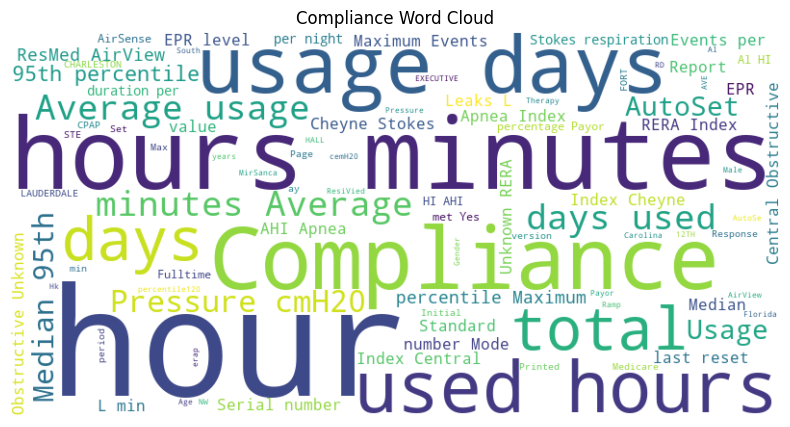

In [9]:
create_word_cloud(combined_texts_by_label['Compliance'], 'Compliance Word Cloud')

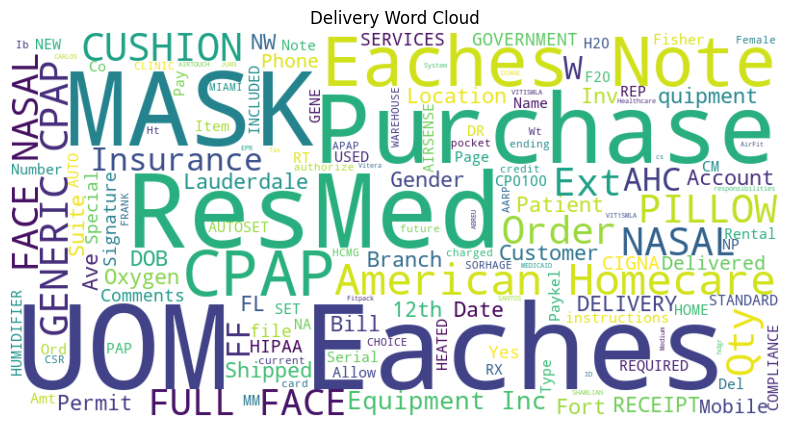

In [10]:
create_word_cloud(combined_texts_by_label['Delivery'], 'Delivery Word Cloud')

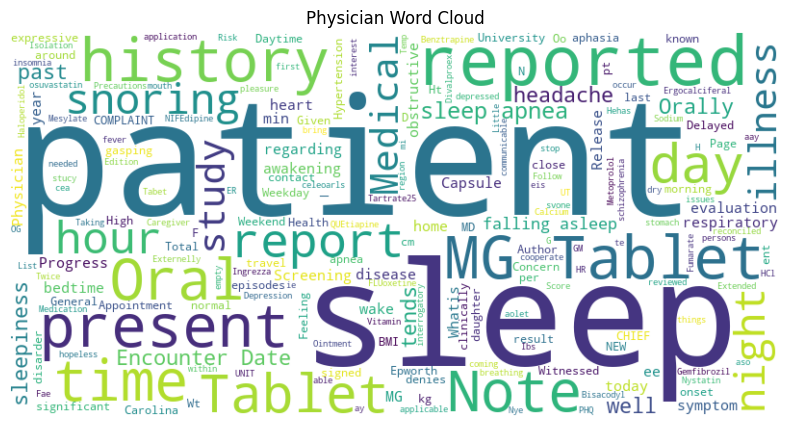

In [11]:
create_word_cloud(combined_texts_by_label['Physician'], 'Physician Word Cloud')


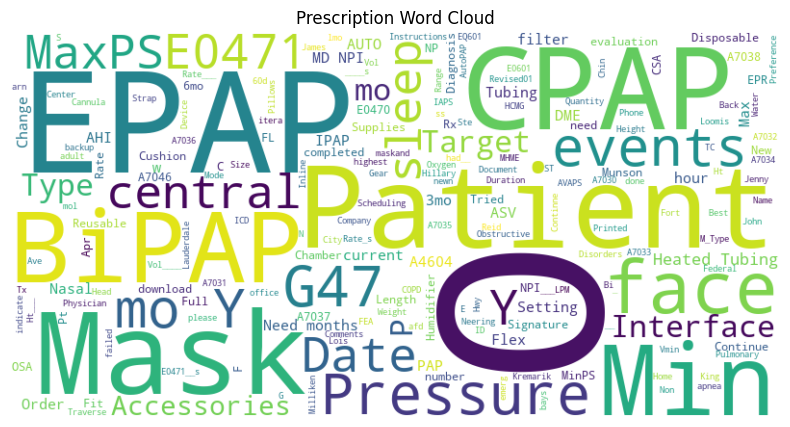

In [12]:
create_word_cloud(combined_texts_by_label['Prescription'], 'Prescription Word Cloud')


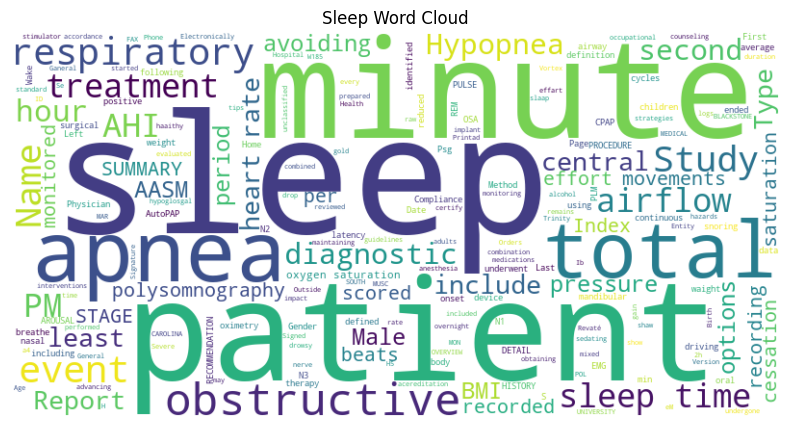

In [13]:
create_word_cloud(combined_texts_by_label['Sleep'], 'Sleep Word Cloud')


# Future work:
1. Use LLMs to clean the data and perform the analysis 
2. Compare Raw data vs Cleaned data analysis